In [1]:
from src.data import dataset_loader
import importlib 
import pickle
importlib.reload(dataset_loader)
from matplotlib import pyplot as plt
import distinctipy
from matplotlib import pyplot as plt
import cv2
import os
#### Need to preprocess all pedestrian trajectories of different datasets for fast loading.

### Eth/UCY

In [11]:
# For ETH
datasets = ["eth", "hotel"] 
            
# For ETH/UCY
for dataset in datasets:
    print("Preprocessing %s..." % dataset)
    #dataset = "eth"
    dataloader = dataset_loader.DatasetLoader(dataset=dataset, 
                            dim_hidden_state=12, 
                            min_length_seqs=20, 
                            with_hidden_state=False)  
    dataloader.load()
    dataloader.preprocess()
    
    # df of trajectories
    if not os.path.exists("../data_preprocessed/ETH"):
        os.makedirs("../data_preprocessed/ETH")
    dataloader.agent_df.to_pickle("../data_preprocessed/ETH/%s_df.pkl" % dataset)

Preprocessing eth...
n_before=263, n_after=263
Preprocessing hotel...
n_before=99, n_after=99


### SDD

In [2]:
sdd_dataset = {"bookstore" : 7, "coupa" : 4, "deathCircle" : 5, "gates" : 9, "hyang" : 15, "little" : 4, "nexus" : 12, "quad" : 4}

datasets = []
for k,v in sdd_dataset.items():
    for i in range(v):
        #datasets.append((k, "video%s"%i))
        datasets.append((k, i))
#datasets

In [6]:
# For SDD
for sdd_scene_name, sdd_seq in datasets:
    print("Preprocessing %s - video%s..." % (sdd_scene_name, sdd_seq) )
    #dataset = "eth"
    dataloader = dataset_loader.DatasetLoader(dataset="sdd", 
                                            sdd_scene_name=sdd_scene_name, 
                                            sdd_seq=sdd_seq, 
                                            dim_hidden_state=12, 
                                            min_length_seqs=20, 
                                            with_hidden_state=False)  
    dataloader.load()
    dataloader.preprocess()
    
    # df of trajectories
    dataloader.agent_df.to_pickle("../data_preprocessed/SDD/%s_video%s_df.pkl" % (sdd_scene_name, sdd_seq))

Preprocessing bookstore - video0...
n_before=116, n_after=86
Preprocessing bookstore - video1...
n_before=168, n_after=113
Preprocessing bookstore - video2...
n_before=146, n_after=118
Preprocessing bookstore - video3...
n_before=167, n_after=127
Preprocessing bookstore - video4...
n_before=90, n_after=73
Preprocessing bookstore - video5...
n_before=102, n_after=78
Preprocessing bookstore - video6...
n_before=107, n_after=80
Preprocessing coupa - video0...
n_before=80, n_after=61
Preprocessing coupa - video1...
n_before=54, n_after=44
Preprocessing coupa - video2...
n_before=66, n_after=48
Preprocessing coupa - video3...
n_before=97, n_after=55
Preprocessing deathCircle - video0...
n_before=308, n_after=244
Preprocessing deathCircle - video1...
n_before=358, n_after=299
Preprocessing deathCircle - video2...
n_before=17, n_after=14
Preprocessing deathCircle - video3...
n_before=224, n_after=188
Preprocessing deathCircle - video4...
n_before=10, n_after=5
Preprocessing gates - video0...


### GC

In [2]:
# For GC
dataloader = dataset_loader.DatasetLoader(dataset="gc", 
                            dim_hidden_state=12, 
                            min_length_seqs=20, 
                            with_hidden_state=False,
                            with_graph_sequences=False)  
dataloader.load()
dataloader.preprocess()

OpenTraj/datasets/GC/Annotation
['000001.txt', '000002.txt', '000003.txt', '000004.txt', '000005.txt', '000006.txt', '000007.txt', '000008.txt', '000009.txt', '000010.txt', '000011.txt', '000012.txt', '000013.txt', '000014.txt', '000015.txt', '000016.txt', '000017.txt', '000018.txt', '000019.txt', '000020.txt', '000021.txt', '000022.txt', '000023.txt', '000024.txt', '000025.txt', '000026.txt', '000027.txt', '000028.txt', '000029.txt', '000030.txt', '000031.txt', '000032.txt', '000033.txt', '000034.txt', '000035.txt', '000036.txt', '000037.txt', '000038.txt', '000039.txt', '000040.txt', '000041.txt', '000042.txt', '000043.txt', '000044.txt', '000045.txt', '000046.txt', '000047.txt', '000048.txt', '000049.txt', '000050.txt', '000051.txt', '000052.txt', '000053.txt', '000054.txt', '000055.txt', '000056.txt', '000057.txt', '000058.txt', '000059.txt', '000060.txt', '000061.txt', '000062.txt', '000063.txt', '000064.txt', '000065.txt', '000066.txt', '000067.txt', '000068.txt', '000069.txt', '

19508it [00:35, 551.39it/s] 


n_before=13514, n_after=13514


In [3]:
if not os.path.exists("../data_preprocessed/GC"):
    os.makedirs("../data_preprocessed/GC")
dataloader.agent_df.to_pickle("../data_preprocessed/GC/gc_df.pkl")

In [3]:
import pandas as pd

In [4]:
pd.__version__

'2.1.4'

### InD

### FORUM

In [1]:
from src.data import dataset_loader
import numpy as np
import pandas as pd

import importlib 

importlib.reload(dataset_loader)
dataloader = dataset_loader.DatasetLoader(dataset="forum", 
                                          sdd_scene_name="14Jul",
                            dim_hidden_state=12, 
                            min_length_seqs=20, 
                            with_hidden_state=False,
                            with_graph_sequences=False)  
dataloader.load()
dataloader.preprocess()

reading:OpenTraj/datasets/Edinburgh/annotations/tracks.14Jul.txt


100%|██████████| 2804/2804 [01:04<00:00, 43.22it/s]


In [5]:
if not os.path.exists("../data_preprocessed/Forum"):
    os.makedirs("../data_preprocessed/Forum")
dataloader.agent_df.to_pickle("../data_preprocessed/Forum/forum_14Jul_df.pkl")

In [ ]:
#### Preprocess several days of forum and use them later to get a large set of rollouts.

In [28]:
import glob
import os
forum_days = glob.glob("OpenTraj/datasets/Edinburgh/annotations/*.txt")
forum_days

['OpenTraj/datasets/Edinburgh/annotations/tracks.22Jul.txt',
 'OpenTraj/datasets/Edinburgh/annotations/tracks.27Aug.txt',
 'OpenTraj/datasets/Edinburgh/annotations/tracks.19Jan.txt',
 'OpenTraj/datasets/Edinburgh/annotations/tracks.07Jan.txt',
 'OpenTraj/datasets/Edinburgh/annotations/tracks.01Aug.txt',
 'OpenTraj/datasets/Edinburgh/annotations/tracks.16Sep.txt',
 'OpenTraj/datasets/Edinburgh/annotations/tracks.09Oct.txt',
 'OpenTraj/datasets/Edinburgh/annotations/tracks.11Jan.txt',
 'OpenTraj/datasets/Edinburgh/annotations/tracks.20Jul.txt',
 'OpenTraj/datasets/Edinburgh/annotations/tracks.06Oct.txt',
 'OpenTraj/datasets/Edinburgh/annotations/tracks.18Jun.txt',
 'OpenTraj/datasets/Edinburgh/annotations/tracks.15Dec.txt',
 'OpenTraj/datasets/Edinburgh/annotations/tracks.04Sep.txt',
 'OpenTraj/datasets/Edinburgh/annotations/tracks.01Sep.txt',
 'OpenTraj/datasets/Edinburgh/annotations/tracks.13Jan.txt',
 'OpenTraj/datasets/Edinburgh/annotations/tracks.01Jul.txt',
 'OpenTraj/datasets/Edin

In [33]:
days = [os.path.split(day)[1].split(".")[1] for day in forum_days]

In [34]:
days

['22Jul',
 '27Aug',
 '19Jan',
 '07Jan',
 '01Aug',
 '16Sep',
 '09Oct',
 '11Jan',
 '20Jul',
 '06Oct',
 '18Jun',
 '15Dec',
 '04Sep',
 '01Sep',
 '13Jan',
 '01Jul',
 '02Oct',
 '03Jun',
 '16Jun',
 '17Jun',
 '14Jun',
 '26Aug',
 '04Jun',
 '18Jan',
 '14Jul',
 '28Sep',
 '23Sep']

In [35]:
#### Get dataframe for each day that works...
forum_dfs = {}
for day in days:
    try:
        dataloader = dataset_loader.DatasetLoader(dataset="forum", 
                                                  sdd_scene_name=day,
                                    dim_hidden_state=12, 
                                    min_length_seqs=20, 
                                    with_hidden_state=False,
                                    with_graph_sequences=False)  
        dataloader.load()
        dataloader.preprocess()
        forum_dfs[day] = dataloader.agent_df
    except:
        print("%s can not get loaded" % day)

reading:OpenTraj/datasets/Edinburgh/annotations/tracks.22Jul.txt


100%|██████████| 1508/1508 [01:24<00:00, 17.89it/s]


Warning! too big dt in [Edinburgh]
finish
n_before=542, n_after=542
reading:OpenTraj/datasets/Edinburgh/annotations/tracks.27Aug.txt


100%|██████████| 2046/2046 [01:49<00:00, 18.67it/s]


Warning! too big dt in [Edinburgh]
finish
n_before=878, n_after=878
reading:OpenTraj/datasets/Edinburgh/annotations/tracks.19Jan.txt


100%|██████████| 1203/1203 [00:46<00:00, 25.67it/s]


Warning! too big dt in [Edinburgh]
finish
n_before=245, n_after=245
reading:OpenTraj/datasets/Edinburgh/annotations/tracks.07Jan.txt


100%|██████████| 1165/1165 [00:51<00:00, 22.54it/s]


Warning! too big dt in [Edinburgh]
finish
n_before=359, n_after=359
reading:OpenTraj/datasets/Edinburgh/annotations/tracks.01Aug.txt


100%|██████████| 146/146 [00:11<00:00, 12.95it/s]


Warning! too big dt in [Edinburgh]
finish
n_before=58, n_after=58
reading:OpenTraj/datasets/Edinburgh/annotations/tracks.16Sep.txt


100%|██████████| 1301/1301 [01:00<00:00, 21.39it/s]


Warning! too big dt in [Edinburgh]
finish
n_before=414, n_after=414
reading:OpenTraj/datasets/Edinburgh/annotations/tracks.09Oct.txt


100%|██████████| 2046/2046 [01:43<00:00, 19.78it/s]


Warning! too big dt in [Edinburgh]
finish
n_before=754, n_after=754
reading:OpenTraj/datasets/Edinburgh/annotations/tracks.11Jan.txt


100%|██████████| 1583/1583 [01:22<00:00, 19.13it/s]


Warning! too big dt in [Edinburgh]
finish
n_before=553, n_after=553
reading:OpenTraj/datasets/Edinburgh/annotations/tracks.20Jul.txt


100%|██████████| 2631/2631 [02:21<00:00, 18.55it/s]


Warning! too big dt in [Edinburgh]
finish
n_before=990, n_after=990
reading:OpenTraj/datasets/Edinburgh/annotations/tracks.06Oct.txt


100%|██████████| 1581/1581 [01:20<00:00, 19.65it/s]


Warning! too big dt in [Edinburgh]
finish
n_before=565, n_after=565
reading:OpenTraj/datasets/Edinburgh/annotations/tracks.18Jun.txt


100%|██████████| 2283/2283 [01:41<00:00, 22.55it/s]


Warning! too big dt in [Edinburgh]
finish
n_before=663, n_after=663
reading:OpenTraj/datasets/Edinburgh/annotations/tracks.15Dec.txt


100%|██████████| 1092/1092 [00:54<00:00, 20.01it/s] 


Warning! too big dt in [Edinburgh]
finish
n_before=323, n_after=323
reading:OpenTraj/datasets/Edinburgh/annotations/tracks.04Sep.txt


100%|██████████| 1701/1701 [01:27<00:00, 19.55it/s]


Warning! too big dt in [Edinburgh]
finish
n_before=653, n_after=653
reading:OpenTraj/datasets/Edinburgh/annotations/tracks.01Sep.txt
01Sep can not get loaded
reading:OpenTraj/datasets/Edinburgh/annotations/tracks.13Jan.txt


100%|██████████| 1580/1580 [01:22<00:00, 19.13it/s]


Warning! too big dt in [Edinburgh]
finish
n_before=516, n_after=516
reading:OpenTraj/datasets/Edinburgh/annotations/tracks.01Jul.txt


100%|██████████| 1262/1262 [00:58<00:00, 21.57it/s]


Warning! too big dt in [Edinburgh]
finish
n_before=457, n_after=457
reading:OpenTraj/datasets/Edinburgh/annotations/tracks.02Oct.txt


100%|██████████| 1664/1664 [01:19<00:00, 21.05it/s]


Warning! too big dt in [Edinburgh]
finish
n_before=579, n_after=579
reading:OpenTraj/datasets/Edinburgh/annotations/tracks.03Jun.txt


100%|██████████| 1658/1658 [01:24<00:00, 19.55it/s] 


Warning! too big dt in [Edinburgh]
finish
n_before=633, n_after=633
reading:OpenTraj/datasets/Edinburgh/annotations/tracks.16Jun.txt


100%|██████████| 2126/2126 [01:32<00:00, 22.94it/s]


Warning! too big dt in [Edinburgh]
finish
n_before=757, n_after=757
reading:OpenTraj/datasets/Edinburgh/annotations/tracks.17Jun.txt


100%|██████████| 2064/2064 [01:34<00:00, 21.91it/s]


Warning! too big dt in [Edinburgh]
finish
n_before=761, n_after=761
reading:OpenTraj/datasets/Edinburgh/annotations/tracks.14Jun.txt


100%|██████████| 1677/1677 [01:10<00:00, 23.80it/s]


Warning! too big dt in [Edinburgh]
finish
n_before=587, n_after=587
reading:OpenTraj/datasets/Edinburgh/annotations/tracks.26Aug.txt


100%|██████████| 1992/1992 [01:32<00:00, 21.55it/s]


Warning! too big dt in [Edinburgh]
finish
n_before=843, n_after=843
reading:OpenTraj/datasets/Edinburgh/annotations/tracks.04Jun.txt


100%|██████████| 1975/1975 [01:21<00:00, 24.12it/s]


Warning! too big dt in [Edinburgh]
finish
n_before=694, n_after=694
reading:OpenTraj/datasets/Edinburgh/annotations/tracks.18Jan.txt


100%|██████████| 1025/1025 [00:35<00:00, 28.96it/s]


Warning! too big dt in [Edinburgh]
finish
n_before=184, n_after=184
reading:OpenTraj/datasets/Edinburgh/annotations/tracks.14Jul.txt


100%|██████████| 2804/2804 [03:03<00:00, 15.31it/s]


Warning! too big dt in [Edinburgh]
finish
n_before=1331, n_after=1331
reading:OpenTraj/datasets/Edinburgh/annotations/tracks.28Sep.txt


100%|██████████| 1592/1592 [01:08<00:00, 23.08it/s]


Warning! too big dt in [Edinburgh]
finish
n_before=485, n_after=485
reading:OpenTraj/datasets/Edinburgh/annotations/tracks.23Sep.txt


100%|██████████| 1927/1927 [01:22<00:00, 23.36it/s]


Warning! too big dt in [Edinburgh]
finish
n_before=713, n_after=713


In [ ]:
# 01 Sep could not get loaded

In [68]:
days

['22Jul',
 '27Aug',
 '19Jan',
 '07Jan',
 '01Aug',
 '16Sep',
 '09Oct',
 '11Jan',
 '20Jul',
 '06Oct',
 '18Jun',
 '15Dec',
 '04Sep',
 '01Sep',
 '13Jan',
 '01Jul',
 '02Oct',
 '03Jun',
 '16Jun',
 '17Jun',
 '14Jun',
 '26Aug',
 '04Jun',
 '18Jan',
 '14Jul',
 '28Sep',
 '23Sep']

In [37]:
for day, df in forum_dfs.items():
    df.to_pickle("../data_preprocessed/Forum/forum_%s_df.pkl" % day)

In [6]:
import pandas as pd

In [7]:
df = pd.read_pickle("../data_preprocessed/Forum/forum_df.pkl")

In [65]:
import pandas as pd

In [70]:
df = pd.read_pickle("../data_preprocessed/Forum/forum_22Jul_df.pkl")

In [72]:
df = pd.read_pickle("../data_preprocessed/Forum/forum_14Jul_df.pkl")

In [8]:
df

,frame_id,agent_id,pos_x,pos_y,goal_x,goal_y,start_x,start_y
23,139,2,77.0,303.0,161.0,8.0,77.0,303.0
24,140,2,76.0,311.0,161.0,8.0,77.0,303.0
25,141,2,92.0,300.0,161.0,8.0,77.0,303.0
26,142,2,127.0,278.0,161.0,8.0,77.0,303.0
27,143,2,145.0,259.0,161.0,8.0,77.0,303.0
...,...,...,...,...,...,...,...,...
67885,16095,2625,626.0,339.0,631.0,424.0,484.0,7.0
67886,16096,2625,623.0,354.0,631.0,424.0,484.0,7.0
67887,16097,2625,628.0,379.0,631.0,424.0,484.0,7.0
67888,16098,2625,629.0,402.0,631.0,424.0,484.0,7.0


In [9]:
df.sort_values(by="frame_id")

,frame_id,agent_id,pos_x,pos_y,goal_x,goal_y,start_x,start_y
49008,0,1766,629.0,280.0,634.0,283.0,629.0,280.0
51044,0,1872,156.0,402.0,615.0,19.0,156.0,402.0
51045,1,1872,217.0,348.0,615.0,19.0,156.0,402.0
49009,1,1766,630.0,281.0,634.0,283.0,629.0,280.0
49010,2,1766,629.0,277.0,634.0,283.0,629.0,280.0
...,...,...,...,...,...,...,...,...
32837,20182,1122,111.0,435.0,111.0,447.0,70.0,4.0
32859,20182,1123,134.0,408.0,122.0,438.0,301.0,10.0
32838,20183,1122,111.0,447.0,111.0,447.0,70.0,4.0
32860,20183,1123,130.0,421.0,122.0,438.0,301.0,10.0


In [10]:
df.frame_id // 4

23         34
24         35
25         35
26         35
27         35
         ... 
67885    4023
67886    4024
67887    4024
67888    4024
67889    4024
Name: frame_id, Length: 48154, dtype: int64

In [11]:
import cv2
def get_homog():
    image_9points = [[155,86.6],[350,95.4],[539,106],[149,206],[345,215],[537,223],[144,327],[341,334],[533,340]]
    #use top left points as origin
    image_9points_shifted = [[x-image_9points[0][0],y-image_9points[0][1]] for x,y in image_9points] 
    #world plane points
    d_vert = 2.97
    d_hori = 4.85
    world_9points=[]
    for i in range(3):
        for j in range(3):
            world_9points.append([d_hori*j,d_vert*i])
        
    #find homog matrix   
    h, status = cv2.findHomography(np.array(image_9points_shifted), np.array(world_9points))

    return h

In [12]:
np.savetxt("OpenTraj/datasets/Edinburgh/H.txt", H)

In [12]:
H = get_homog()

In [13]:
H

array([[ 2.44923560e-02,  1.10790505e-03,  6.62031019e-03],
       [-1.26360413e-03,  2.48863885e-02,  6.06410516e-03],
       [-7.01804022e-05,  4.26454048e-05,  1.00000000e+00]])

In [22]:
from src.data import scene_loader
import importlib
importlib.reload(scene_loader)

<module 'src.data.scene_loader' from '/home/thomas/approaches/imcrowds_github/tk-environment/src/data/scene_loader.py'>

In [23]:
trajscene = scene_loader.TrajScene(dataset_name="forum", scene_name="", scale_factor=1, data_root="")
trajs, trajs_df, coord_transform, img_semantic, img_reference, _, _= trajscene.get_scene()


In [24]:
from matplotlib import pyplot as plt
import cv2

In [25]:
img_reference = cv2.imread( "OpenTraj/datasets/Edinburgh/images/2.jpg")

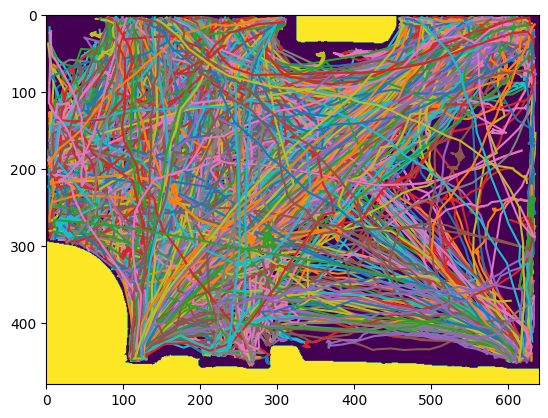

In [26]:
plt.imshow(img_semantic)
for k, v in trajs.items():
    pos = v[["pos_x", "pos_y"]].values
    #pos = coord_transform.get_pixel_positions(pos)
    plt.plot(pos[:,0], pos[:,1])

In [4]:
import torch
from sklearn.preprocessing import MinMaxScaler

In [40]:
days_prepped = ['22Jul', '27Aug',
 '19Jan',
 '07Jan',
 '01Aug',
 '16Sep',
 '09Oct',
 '11Jan',
 '20Jul',
 '06Oct',
 '18Jun',
 '15Dec',
 '04Sep',
 '13Jan',
 '01Jul',
 '02Oct',
 '03Jun',
 '16Jun',
 '17Jun',
 '14Jun',
 '26Aug',
 '04Jun',
 '18Jan',
 '14Jul',
 '28Sep',
 '23Sep']

In [21]:
from imitation.data.types import Trajectory

In [51]:
### Now we concat rollouts...
concat_rolls = []
all_acts = []
all_obs = []
for day in days_prepped:
    rollouts = torch.load("../data_preprocessed/Forum/%s_rollouts_r32_s1.pt" % day)
    scaler = MinMaxScaler((-1,1))
    scales = torch.load("../data_preprocessed/Forum/%s_actionscales.pt" % day)
    scaler.fit(scales)
    
    rescaled = [scaler.inverse_transform(roll.acts) for roll in rollouts]
    all_acts.extend(rescaled)
    all_obs.extend([roll.obs for roll in rollouts])

In [52]:
import numpy as np

In [53]:
all_scaler = MinMaxScaler((-1,1))
all_scaler.fit(np.vstack(all_acts))

MinMaxScaler(feature_range=(-1, 1))

In [54]:
final_rollouts = [Trajectory(obs = obs, acts=all_scaler.transform(acts), infos=None, terminal=True) for acts, obs in zip(all_acts, all_obs)]

In [55]:
final_rollouts[0].acts

array([[-0.23178808,  0.04428904],
       [-0.26269316,  0.04895105],
       [-0.27593819,  0.01165501],
       [-0.27593819,  0.01165501],
       [-0.27152318,  0.01631702],
       [-0.30242826, -0.05827506],
       [-0.26269316,  0.03030303],
       [-0.27152318,  0.01165501],
       [-0.25827815,  0.002331  ],
       [-0.26269316,  0.01631702],
       [-0.26269316,  0.01165501],
       [-0.26710817, -0.002331  ],
       [-0.24944812,  0.01631702],
       [-0.25827815,  0.03030303],
       [-0.28476821,  0.01631702],
       [-0.25386313,  0.002331  ],
       [-0.26710817, -0.03496503],
       [-0.26710817,  0.03496503],
       [-0.24503311, -0.01165501],
       [-0.25827815,  0.01631702],
       [-0.24944812,  0.03030303],
       [-0.24944812, -0.00699301],
       [-0.26269316,  0.02097902],
       [-0.26269316,  0.00699301],
       [-0.23178808,  0.05361305]])

In [56]:
len(final_rollouts)

15537

In [63]:
torch.save(final_rollouts, "../data_preprocessed/Forum/forum_rollouts_r32_s1.pt")
torch.save(np.vstack([all_scaler.data_max_, all_scaler.data_min_]), "../data_preprocessed/Forum/forum_actionscales.pt")


### MIT

In [10]:
import scipy.io
mat = scipy.io.loadmat('OpenTraj/datasets/MIT/filtTrk_parkinglot.mat')

In [12]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'trk'])

In [19]:
mat['trk'][0][0]

(array([[315, 327, 333, 334, 339, 340, 342, 342, 344, 345, 347, 347, 348,
        349, 351, 352, 353, 354, 355, 357, 357, 359, 360, 361, 362, 363,
        364, 366, 367, 368, 369, 370, 371, 372, 373, 374, 376, 377, 378,
        379, 379, 381, 381, 382, 383, 385, 387, 388, 389, 390, 391, 392,
        392, 394, 394, 395, 397, 398, 399, 400, 402, 403, 404, 406, 407,
        408, 409, 410, 411, 412, 413, 414, 415, 418, 419, 420, 422, 423,
        424, 426, 428, 430, 432, 433, 434, 436, 437, 438, 439, 441, 443,
        445, 447, 449, 452, 452, 454, 456, 456, 458, 459, 460, 461, 462,
        463, 464, 466, 467, 469, 470, 471, 472, 474, 475]], dtype=uint16), array([[146, 143, 145, 145, 146, 148, 147, 151, 148, 148, 147, 148, 147,
        149, 149, 147, 149, 149, 149, 149, 150, 150, 150, 150, 150, 150,
        150, 150, 151, 151, 151, 151, 152, 152, 151, 153, 153, 153, 151,
        153, 154, 153, 154, 154, 154, 154, 155, 155, 154, 155, 156, 157,
        156, 157, 158, 158, 158, 158, 158, 158, 

In [23]:
x = mat['trk'][0][0]

In [32]:
img_reference = cv2.imread("OpenTraj/datasets/MIT/parkinglotBg.png")

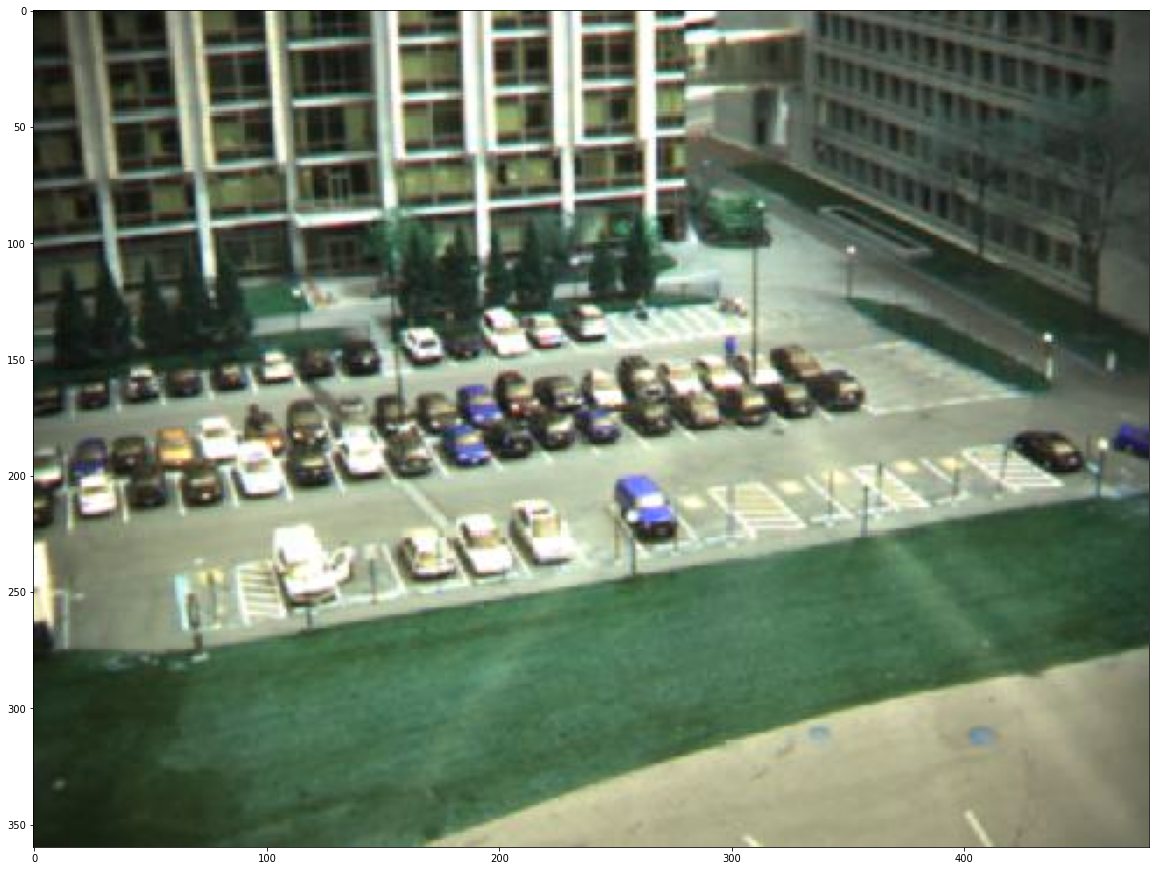

In [35]:
plt.figure(figsize=(20,20))
plt.imshow(img_reference)


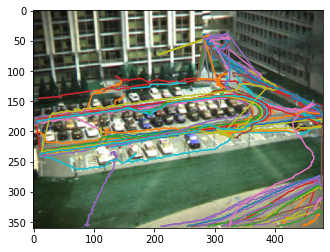

In [36]:
plt.imshow(img_reference)
for traj in mat['trk'][0][:100]:
    plt.plot(traj[0][0], traj[1][0])

[]

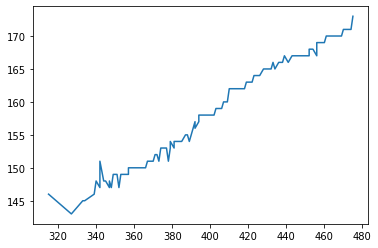

In [30]:
plt.plot(x[0][0], x[1][0])

### MIT Traffic

In [37]:
import scipy.io
mat = scipy.io.loadmat('OpenTraj/datasets/MITTraffic/ground_truth_data_train.mat')

NotImplementedError: Please use HDF reader for matlab v7.3 files, e.g. h5py

### ATC

In [1]:
from matplotlib import pyplot as plt
import cv2
import pandas as pd

In [ ]:
pd.read_p

In [1]:
from src.data import dataset_loader
import numpy as np
import pandas as pd

import importlib 

importlib.reload(dataset_loader)
dataloader = dataset_loader.DatasetLoader(dataset="atc", 
                                          sdd_scene_name="atc",
                            dim_hidden_state=12, 
                            min_length_seqs=20, 
                            with_hidden_state=False,
                            with_graph_sequences=False)  
dataloader.load()
dataloader.preprocess()

n_before=15596, n_after=15596


In [6]:
dataloader.agent_df.frame_id = (dataloader.agent_df.frame_id - 0) // 15 # have to do this again depending on which sampling rate..
dataloader.agent_df.to_pickle("../data_preprocessed/ATC/atc_15_df.pkl")

In [5]:
dataloader.agent_df

,frame_id,agent_id,pos_x,pos_y,goal_x,goal_y,start_x,start_y
0,0.0,9315400.0,845.161818,82.351489,462.136390,411.232632,845.161818,82.351489
15,1.0,9315400.0,843.515455,85.948762,462.136390,411.232632,845.161818,82.351489
30,2.0,9315400.0,839.854675,87.641489,462.136390,411.232632,845.161818,82.351489
45,3.0,9315400.0,837.819874,89.122323,462.136390,411.232632,845.161818,82.351489
60,4.0,9315400.0,835.238961,91.574347,462.136390,411.232632,845.161818,82.351489
...,...,...,...,...,...,...,...,...
75,87064.0,20260500.0,93.108340,291.679315,107.161591,302.734898,75.161818,280.581489
90,87065.0,20260500.0,96.567350,295.528298,107.161591,302.734898,75.161818,280.581489
105,87066.0,20260500.0,99.702794,297.113684,107.161591,302.734898,75.161818,280.581489
120,87067.0,20260500.0,104.878318,299.870489,107.161591,302.734898,75.161818,280.581489


In [2]:
dataloader.agent_df.agent_id.unique()

array([ 9315400.,  9330400.,  9330600., ..., 20260400., 20260401.,
       20260500.])

In [3]:
(dataloader.agent_df.agent_id - min(dataloader.agent_df.agent_id))

0             0.0
15            0.0
30            0.0
45            0.0
60            0.0
          ...    
75     10945100.0
90     10945100.0
105    10945100.0
120    10945100.0
135    10945100.0
Name: agent_id, Length: 951572, dtype: float64

In [3]:
dataloader.agent_df

,frame_id,agent_id,pos_x,pos_y,goal_x,goal_y,start_x,start_y
0,0.0,0.0,845.161818,82.351489,461.569818,409.357489,845.161818,82.351489
30,2.0,0.0,839.854675,87.641489,461.569818,409.357489,845.161818,82.351489
60,4.0,0.0,835.238961,91.574347,461.569818,409.357489,845.161818,82.351489
90,6.0,0.0,828.640909,98.195126,461.569818,409.357489,845.161818,82.351489
120,8.0,0.0,823.468485,103.444823,461.569818,409.357489,845.161818,82.351489
...,...,...,...,...,...,...,...,...
0,87059.0,10945100.0,75.161818,280.581489,104.878318,299.870489,75.161818,280.581489
30,87061.0,10945100.0,84.099773,284.838535,104.878318,299.870489,75.161818,280.581489
60,87063.0,10945100.0,90.628182,289.085580,104.878318,299.870489,75.161818,280.581489
90,87065.0,10945100.0,96.567350,295.528298,104.878318,299.870489,75.161818,280.581489


In [4]:
dataloader.agent_df.frame_id

0          0.0
30         1.0
60         2.0
90         3.0
120        4.0
        ...   
0      43529.0
30     43530.0
60     43531.0
90     43532.0
120    43533.0
Name: frame_id, Length: 479663, dtype: float64

In [11]:
dataloader.agent_df

,frame_id,agent_id,pos_x,pos_y,goal_x,goal_y,start_x,start_y
0,0,9315400,845.161818,82.351489,462.191548,411.349597,845.161818,82.351489
1,1,9315400,845.320642,82.148548,462.191548,411.349597,845.161818,82.351489
2,2,9315400,845.148675,82.262632,462.191548,411.349597,845.161818,82.351489
3,3,9315400,845.040985,82.282323,462.191548,411.349597,845.161818,82.351489
4,4,9315400,844.905936,82.521783,462.191548,411.349597,845.161818,82.351489
...,...,...,...,...,...,...,...,...
142,1306037,20260500,108.448330,303.946838,109.046818,304.938156,75.161818,280.581489
143,1306038,20260500,108.601818,304.175489,109.046818,304.938156,75.161818,280.581489
144,1306039,20260500,108.770655,304.438931,109.046818,304.938156,75.161818,280.581489
145,1306040,20260500,108.939675,304.709585,109.046818,304.938156,75.161818,280.581489


In [39]:
def mask_step(x, step):
    """
    Create a mask to only contain the step-th element starting from the first element. Used to downsample
    """
    mask = np.zeros_like(x)
    mask[::step] = 1
    return mask.astype(bool)

def downsample(df, step):
    """
    Downsample data by the given step. Example, SDD is recorded in 30 fps, with step=30, the fps of the resulting
    df will become 1 fps. With step=12 the result will be 2.5 fps. It will do so individually for each unique
    pedestrian (metaId)
    :param df: pandas DataFrame - necessary to have column 'metaId'
    :param step: int - step size, similar to slicing-step param as in array[start:end:step]
    :return: pd.df - downsampled
    """
    mask = df.transform(mask_step, step=step)
    return df[mask].dropna()


In [2]:
df = pd.read_csv("OpenTraj/datasets/ATC/atc-20121114.csv", names=["frame_id", "agent_id", "pos_x", "pos_y", "pos_z", "vel", "ang", "facing_angle"])

In [3]:
df["frame_id"] = (df["frame_id"]*1000 - min(df["frame_id"].values)*1000)

In [4]:
import numpy as np
np.set_printoptions(suppress=True)

In [5]:
from scipy.interpolate import interp1d
from tqdm import tqdm

In [6]:
def interpolate_traj(tr):
    interp_F = np.arange(tr["frame_id"].iloc[0], tr["frame_id"].iloc[-1], 30).astype(int)
    interp_X = interp1d(tr["frame_id"], tr["pos_x"], kind='linear')
    interp_X_ = interp_X(interp_F)
    interp_Y = interp1d(tr["frame_id"], tr["pos_y"], kind='linear')
    interp_Y_ = interp_Y(interp_F)
    agent_id = tr["agent_id"].iloc[0]
    #print(agent_id)
    temp = pd.DataFrame({"frame_id": interp_F,"agent_id": agent_id,"pos_x": interp_X_,"pos_y": interp_Y_})
    return temp

In [7]:
aids = df.agent_id.unique()

#raw_dataset = pd.DataFrame()
raw_dataset = []
for aid in tqdm(aids):
    tr = df[df.agent_id == aid]
    temp = interpolate_traj(tr)
    raw_dataset.append(temp)

100%|██████████| 18145/18145 [01:59<00:00, 152.21it/s]


In [103]:
pd.read_pickle("OpenTraj/datasets/ATC/atc.pkl")

,frame_id,agent_id,pos_x,pos_y,goal_x,goal_y,start_x,start_y
0,0,9315400,813.161818,50.351489,1532.972973,10120.810811,39830.0,-22779.0
1,1,9315400,813.320642,50.148548,1532.972973,10120.810811,39830.0,-22779.0
2,2,9315400,813.148675,50.262632,1532.972973,10120.810811,39830.0,-22779.0
3,3,9315400,813.040985,50.282323,1532.972973,10120.810811,39830.0,-22779.0
4,4,9315400,812.905936,50.521783,1532.972973,10120.810811,39830.0,-22779.0
...,...,...,...,...,...,...,...,...
142,1306037,20260500,76.448330,271.946838,-33781.500000,-520.333333,-37170.0,-2956.0
143,1306038,20260500,76.601818,272.175489,-33781.500000,-520.333333,-37170.0,-2956.0
144,1306039,20260500,76.770655,272.438931,-33781.500000,-520.333333,-37170.0,-2956.0
145,1306040,20260500,76.939675,272.709585,-33781.500000,-520.333333,-37170.0,-2956.0


In [8]:
raw_dataset = pd.concat(raw_dataset)
raw_dataset.to_pickle("OpenTraj/datasets/ATC/atc.pkl")

In [88]:
# The positions are way too big, we scale them down.
raw_dataset["pos_x"] = raw_dataset["pos_x"] / 100
raw_dataset["pos_y"] = raw_dataset["pos_y"] / 100

In [95]:
# Also put them towards 0..
raw_dataset["pos_x"] = raw_dataset["pos_x"] - min(raw_dataset["pos_x"])
raw_dataset["pos_y"] = raw_dataset["pos_y"] - min(raw_dataset["pos_y"])

In [12]:
min(dataloader.agent_df["pos_x"]), max(dataloader.agent_df["pos_x"]), min(dataloader.agent_df["pos_y"]), max(dataloader.agent_df["pos_y"])

(32.0, 930.0791651205936, 32.0, 551.9703265710044)

In [136]:
lens = []
for aid in raw_dataset.agent_id.unique():
    lens.append(len(raw_dataset[raw_dataset.agent_id == aid]))

In [145]:
lens = np.array(lens)

In [7]:
raw_dataset = dataloader.agent_df

In [8]:
# agents
aids_filter = np.array([aid for aid in raw_dataset.agent_id.unique()])

In [10]:
dfs = list(raw_dataset.groupby("agent_id"))
dfs = [d[1] for d in list(dfs)]

In [11]:
lens = [len(df) for df in dfs]

In [178]:
aids_filter

array([ 9315400,  9330400,  9330600, ..., 20260400, 20260401, 20260500])

In [183]:
def reject_outliers(data, aids_filter, m = 4.):
    d = np.abs(data - np.median(data))
    mdev = np.median(d)
    s = d/mdev if mdev else np.zeros(len(d))
    return data[s<m], aids_filter[s < m]

In [184]:
# Keep only trajectories at least 100 steps
leng, remaining_aids = reject_outliers(lens, aids_filter)

In [187]:
df_filter = df[df.agent_id.isin(remaining_aids)]

In [193]:
dfs = list(df_filter.groupby("agent_id"))
dfs = [d[1] for d in list(dfs) if len(d[1]) > 20]

In [194]:
lengths = [len(d) for d in dfs]

In [ ]:
dfs = [add_goal(df) for df in dfs]

In [185]:
len(lens), len(leng)

(18144, 17171)

(array([3633., 1825., 1961., 1795., 1949., 1550., 1007.,  783.,  636.,
         457.]),
 array([  51. ,  295.8,  540.6,  785.4, 1030.2, 1275. , 1519.8, 1764.6,
        2009.4, 2254.2, 2499. ]),
 <BarContainer object of 10 artists>)

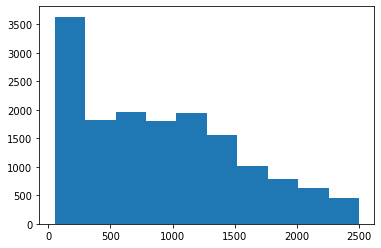

In [13]:
plt.hist(lens)

In [133]:
raw_dataset

,frame_id,agent_id,pos_x,pos_y
0,0,9315400,39830.000000,-22779.000000
1,30,9315400,39845.882353,-22799.294118
2,60,9315400,39828.685714,-22787.885714
3,90,9315400,39817.916667,-22785.916667
4,120,9315400,39804.411765,-22761.970588
...,...,...,...,...
142,39181116,20260500,-33841.348837,-619.465116
143,39181146,20260500,-33826.000000,-596.600000
144,39181176,20260500,-33809.116279,-570.255814
145,39181206,20260500,-33792.214286,-543.190476


In [120]:
len(raw_datasetr

0

In [135]:
traj_dataset = TrajDataset()
traj_dataset.title = "ATC"
traj_dataset.data[["frame_id", "agent_id", "pos_x", "pos_y"]] = raw_dataset[["frame_id", "agent_id", "pos_x", "pos_y"]]
traj_dataset.data["scene_id"] = 0
traj_dataset.data["label"] = "pedestrian"
fps = 30

# post-process
# fps = 30
sampling_rate = 1
use_kalman = False
traj_dataset.postprocess(fps=fps, sampling_rate=sampling_rate, use_kalman=use_kalman)

NameError: name 'TrajDataset' is not defined

In [102]:
#### Interpolate to try to get the same number of frames...

,frame_id,agent_id,pos_x,pos_y,pos_z,vel,ang,facing_angle
0,0.0,9315400,39830,-22779,1704.245,823.082,-0.499,-0.708
3,34.0,9315400,39848,-22802,1704.947,903.930,-0.648,-0.732
6,69.0,9315400,39822,-22783,1706.243,785.811,-0.962,-0.890
9,105.0,9315400,39815,-22788,1706.475,786.133,-0.974,-0.961
12,139.0,9315400,39791,-22729,1706.451,556.775,-0.648,-0.884
...,...,...,...,...,...,...,...,...
5809,47153.0,9315400,1508,10052,1782.825,585.750,1.120,0.922
5814,47188.0,9315400,1519,10073,1782.825,574.348,1.144,1.041
5819,47224.0,9315400,1523,10095,1782.825,530.257,1.304,0.975
5824,47259.0,9315400,1529,10114,1782.825,540.260,1.287,1.058


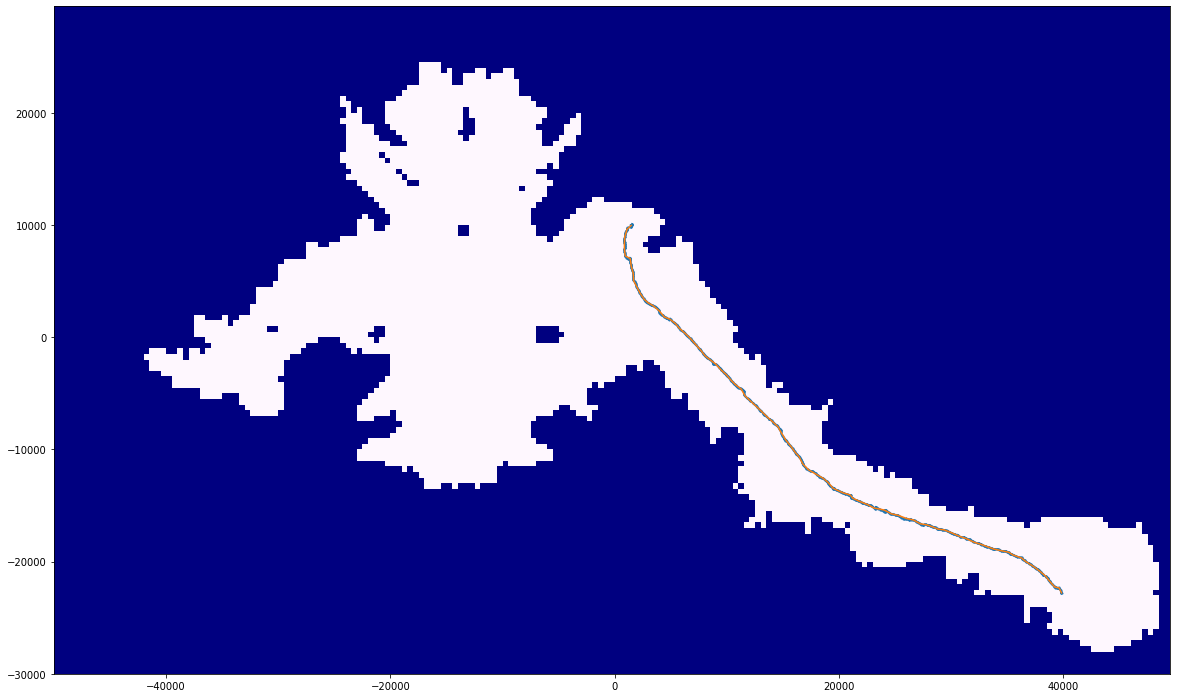

In [109]:
plt.figure(figsize=(20,20))
plt.imshow(H, extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap="gist_ncar", origin="lower")
plt.plot(df_temp.pos_x, df_temp.pos_y)
downsample_df = downsample(df_temp, step=15)
plt.scatter(temp.pos_x, temp.pos_y, s=1)
plt.plot(downsample_df.pos_x,downsample_df.pos_y)

In [46]:
len(downsample(df_temp, step=30))

45

In [14]:
df = dataloader.agent_df

In [15]:
# Assume: Everywhere where pedestrians pass through, there is free space. 
# => Can discretize further to cover more space.
positions = df[["pos_x", "pos_y"]].values

In [36]:
H, xedges, yedges = np.histogram2d(positions[:,0] * 5, positions[:,1] * 5, 
                                   bins=(np.arange(0, max(positions[:,0]*5)+32, 5), np.arange(0, max(positions[:,1]*5)+32, 5)))
H = H.T

In [37]:
H[H > 0] = 1

In [40]:
np.save("OpenTraj/datasets/ATC/map.npy", H)

In [43]:
H.shape

(558, 936)

In [48]:
img = cv2.imread("OpenTraj/datasets/ATC/test.png")

In [80]:
img = cv2.imread("OpenTraj/datasets/ATC/reference.png", flags=0)

In [83]:
img[img != 0]

array([255, 255, 255, ..., 255, 255, 255], dtype=uint8)

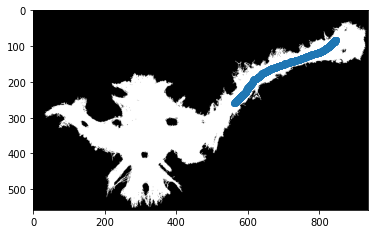

In [79]:
plt.imshow(img)
plt.scatter(positions[:1000,0], positions[:1000,1])


In [77]:
cv2.imwrite("OpenTraj/datasets/ATC/reference.png", H_temp)

True

In [69]:
H_temp = np.zeros((558, 936, 3))
H_temp[np.where(H > 0)] = 255

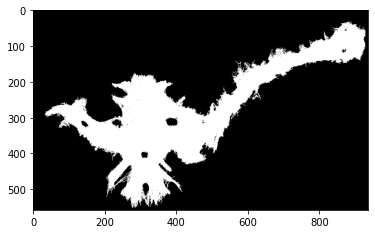

In [59]:
plt.imshow(H_temp)

In [38]:
xedges

array([   0.,    5.,   10.,   15.,   20.,   25.,   30.,   35.,   40.,
         45.,   50.,   55.,   60.,   65.,   70.,   75.,   80.,   85.,
         90.,   95.,  100.,  105.,  110.,  115.,  120.,  125.,  130.,
        135.,  140.,  145.,  150.,  155.,  160.,  165.,  170.,  175.,
        180.,  185.,  190.,  195.,  200.,  205.,  210.,  215.,  220.,
        225.,  230.,  235.,  240.,  245.,  250.,  255.,  260.,  265.,
        270.,  275.,  280.,  285.,  290.,  295.,  300.,  305.,  310.,
        315.,  320.,  325.,  330.,  335.,  340.,  345.,  350.,  355.,
        360.,  365.,  370.,  375.,  380.,  385.,  390.,  395.,  400.,
        405.,  410.,  415.,  420.,  425.,  430.,  435.,  440.,  445.,
        450.,  455.,  460.,  465.,  470.,  475.,  480.,  485.,  490.,
        495.,  500.,  505.,  510.,  515.,  520.,  525.,  530.,  535.,
        540.,  545.,  550.,  555.,  560.,  565.,  570.,  575.,  580.,
        585.,  590.,  595.,  600.,  605.,  610.,  615.,  620.,  625.,
        630.,  635.,

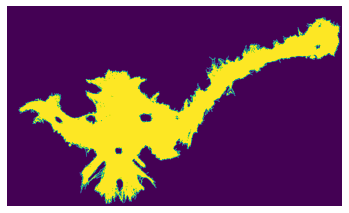

In [42]:
plt.imshow(H)
plt.axis('off')
#plt.scatter(positions[:1000,0], positions[:1000,1])
plt.savefig("OpenTraj/datasets/ATC/test.png")

In [23]:
H.shape

(110, 186)

(0.0, 960.0, 0.0, 580.0)

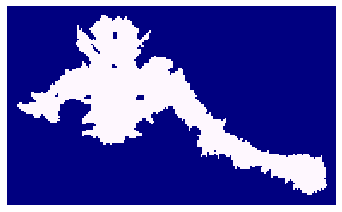

In [27]:
fig = plt.figure(figsize=(20, 10))

ax = fig.add_subplot(131)
plt.imshow(H, interpolation='nearest', origin='lower',
        extent=[0, xedges[-1], yedges[0], yedges[-1]], cmap="gist_ncar")
plt.axis("off")
#plt.savefig("OpenTraj/datasets/ATC/reference.jpg")

In [26]:
[xedges[0], xedges[-1], yedges[0], yedges[-1]]

[-50000, 49500, -30000, 29500]

In [27]:
xedges[0] / 10

-5000.0

In [32]:
img = cv2.imread("OpenTraj/datasets/ATC/reference.jpg")

,frame_id,agent_id,pos_x,pos_y,goal_x,goal_y,start_x,start_y
0,0,9315400,39830.000000,-22779.000000,1532.972973,10120.810811,39830.0,-22779.0
1,1,9315400,39845.882353,-22799.294118,1532.972973,10120.810811,39830.0,-22779.0
2,2,9315400,39828.685714,-22787.885714,1532.972973,10120.810811,39830.0,-22779.0
3,3,9315400,39817.916667,-22785.916667,1532.972973,10120.810811,39830.0,-22779.0
4,4,9315400,39804.411765,-22761.970588,1532.972973,10120.810811,39830.0,-22779.0
...,...,...,...,...,...,...,...,...
1572,1572,9315400,1510.200000,10056.200000,1532.972973,10120.810811,39830.0,-22779.0
1573,1573,9315400,1519.222222,10074.222222,1532.972973,10120.810811,39830.0,-22779.0
1574,1574,9315400,1522.555556,10092.555556,1532.972973,10120.810811,39830.0,-22779.0
1575,1575,9315400,1527.457143,10109.114286,1532.972973,10120.810811,39830.0,-22779.0


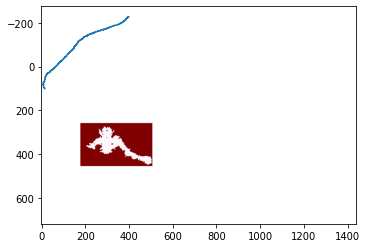

## Test

In [2]:
import pandas as pd

In [ ]:
image_scale_pad(k, self.img_semantic)

In [82]:
### For each respective scene, read trajectories, images, and create the coordinate transform
from src.transform.SDD_Transformer import SDDTransformer
from src.transform.ETH_Transformer import ETHTransformer
from src.transform.UCY_Transformer import UCYTransformer
from src.transform.GC_Transformer  import GCTransformer
import os, yaml
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

class TrajScene:
    
    def __init__(self, dataset_name, scene_name, scale_factor, data_root):
        
        if dataset_name == "sdd":
            # format scene_name=(scene, video), e.g., ("hyang", 4)
            scene = scene_name[0]
            video = scene_name[1]
            
            with open( os.path.join(data_root, "OpenTraj/datasets/SDD/estimated_scales.yaml"), 'r') as stream:
                estimated_scales = yaml.safe_load(stream)
            self.img_semantic = cv2.imread(   os.path.join(data_root, "OpenTraj/datasets/SDD/ynet/data/SDD_semantic_maps/all_masks/%s_%s_mask.png" % (scene, video)), flags=0)
            self.img_reference = cv2.imread(os.path.join(data_root, "OpenTraj/datasets/SDD/ynet/data/SDD/train/%s_%s/reference.jpg" % (scene, video)))
            sdd_scale = estimated_scales[scene]["video%s"%video]["scale"]
            self.coord_transform = SDDTransformer(sdd_scale)
            self.trajectories = { aid : df for aid, df in list(pd.read_pickle("../data_preprocessed/SDD/%s_video%s_df.pkl" % (scene, video) ).groupby("agent_id")) }

            
        elif dataset_name == "eth":
            self.img_semantic = cv2.imread(os.path.join(data_root, "OpenTraj/datasets/ETH/seq_%s/oracle.png" % scene_name), flags=0)
            self.img_reference = cv2.imread(os.path.join(data_root, "OpenTraj/datasets/ETH/seq_%s/reference.png" % scene_name))
            
            homography_mat_path = os.path.join(data_root, "OpenTraj/datasets/ETH/seq_%s/H.txt" % scene_name)
            self.coord_transform = ETHTransformer(homography_mat_path)
            
            self.trajectories = { aid : df for aid, df in list(pd.read_pickle("../data_preprocessed/ETH/%s_df.pkl" % (scene_name) ).groupby("agent_id")) }
            
        elif dataset_name == "gc":
            self.img_reference = cv2.imread( os.path.join(data_root, "OpenTraj/datasets/GC/reference.jpg"))
            #### Mask annotated with https://www.cvat.ai/
            self.img_semantic = cv2.imread( os.path.join(data_root, "OpenTraj/datasets/GC/mask.png"), flags=0)
            self.coord_transform = GCTransformer()
            self.trajectories = { aid : df for aid, df in list(pd.read_pickle("../data_preprocessed/GC/%s_df.pkl" % (scene_name) ).groupby("agent_id")) }
           
        else:
            print("not supported") 
        
        
        
                    
        ### [] TODO image scaling, but thats the same for all datasets.
        self.img_semantic_scaled = self.image_scale_pad(scale_factor, self.img_semantic, seg_mask=True)
        self.img_reference_scaled = self.image_scale_pad(scale_factor, self.img_reference, seg_mask=False)
    
    def resize(self, images, factor, seg_mask=False):
        for key, image in images.items():
            if seg_mask:
                images[key] = cv2.resize(image, (0,0), fx=factor, fy=factor, interpolation=cv2.INTER_NEAREST)
            else:
                images[key] = cv2.resize(image, (0,0), fx=factor, fy=factor, interpolation=cv2.INTER_AREA)

    def pad(self, images, division_factor=16):
        """ Pad image so that it can be divided by division_factor, as many architectures such as UNet needs a specific size
        at it's bottlenet layer"""
        for key, im in images.items():
            if im.ndim == 3:
                H, W, C = im.shape
            else:
                H, W = im.shape
            H_new = int(np.ceil(H / division_factor) * division_factor)
            W_new = int(np.ceil(W / division_factor) * division_factor)
            im = cv2.copyMakeBorder(im, 0, H_new - H, 0, W_new - W, cv2.BORDER_REPLICATE)
            images[key] = im

    def image_scale_pad(self, k, img_semantic, seg_mask=False):
        # Prepare image, we scale the image with a scale factor 1/k and pad to be divisble by patch size.
        scale_factor = 1/k

        #im = img_semantic.transpose(1,2,0)
        im_dict = { "k" : img_semantic}
        self.resize(im_dict, scale_factor, seg_mask=seg_mask)
        # dont pad, we dont use patches....
        self.pad(im_dict, division_factor=32)  # we only try patch sizes 8 and 16 
        
        
        # can we simply scale the positions? yes
        #plt.imshow(im_dict["k"])
        #plt.scatter(pixel_coords[:,0] * scale_factor, pixel_coords[:,1] * scale_factor)
        
        # Put the channel as first.
        #img = torch.Tensor(im_dict["k"].transpose(2,0,1))
        
        return im_dict["k"] 
        
    def get_scene(self):
        return self.trajectories, self.coord_transform, self.img_semantic, self.img_reference, self.img_semantic_scaled, self.img_reference_scaled 

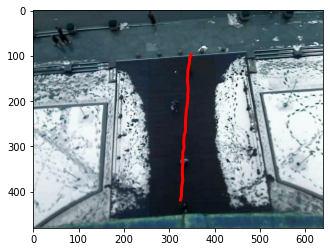

In [140]:
from src.utils.constants import sdd_scenes
eth_scene = TrajScene("eth", "eth", scale_factor=1, data_root="")
trajs, coord_transform, img_semantic, img_reference, img_semantic_scaled, img_reference_scaled  = eth_scene.get_scene()
plt.imshow(img_reference_scaled)
tr = coord_transform.get_pixel_positions(trajs[list(trajs.keys())[np.random.choice(len(trajs))]][["pos_x", "pos_y"]].values)
plt.plot(tr[:,0], tr[:,1], linewidth=3, color="red")

In [ ]:
#### We do a background grid map, where each grid cell has a certain element in its state.
self.cell_size = 1
self.map_width_cells = self.window_width // self.cell_size
self.map_height_cells = self.window_height // self.cell_size
self.occupancy_grid = np.zeros((img_semantic.shape[1], img_semantic.shape[0]))
self.x_cells = np.arange(self.map_width_cells)
self.y_cells = np.arange(self.map_height_cells)

occupancy_grid[np.where(self.img_semantic.T) == 1] = 0
occupancy_grid[np.where(self.img_semantic.T) == 2] = 0
occupancy_grid[np.where(self.img_semantic.T) == 4] = 0 

occupancy_grid[np.where(self.img_semantic.T) == 3] = 1
occupancy_grid[np.where(self.img_semantic.T) == 5] = 1